## Consistency with Constraints

### Keeping Data Consistent

https://www.youtube.com/watch?v=YetrI_0eJTA

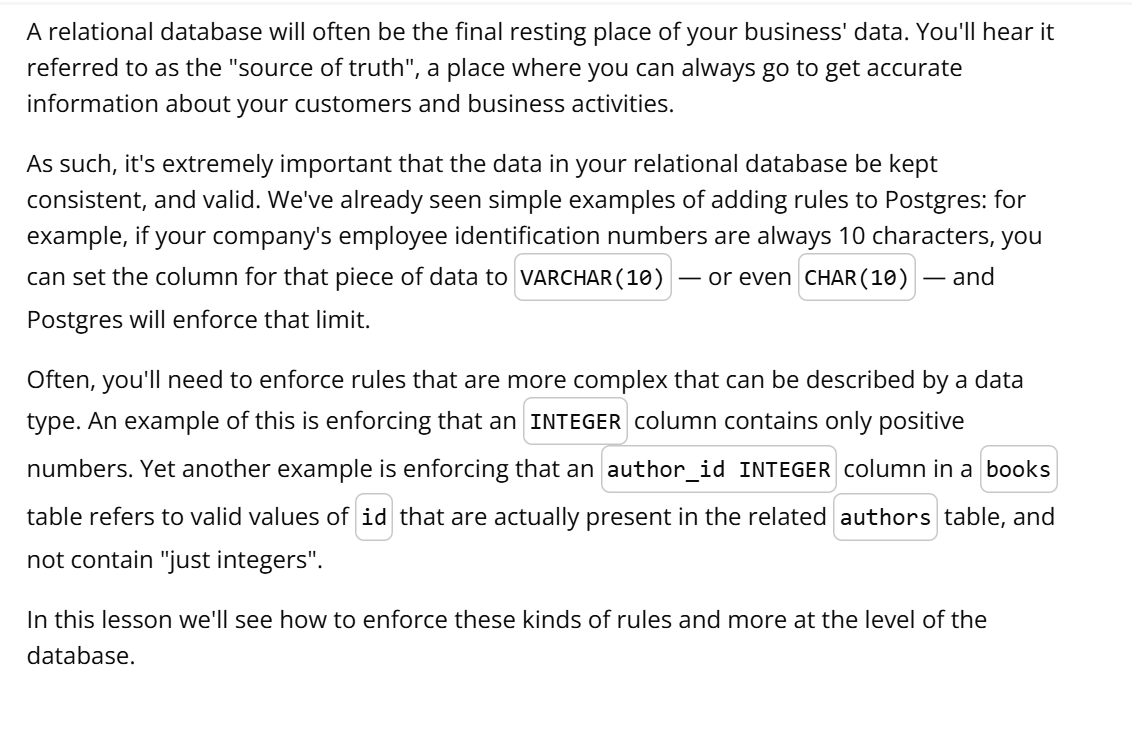

## The Big Picture on Consistency

https://www.youtube.com/watch?v=WWVkUAAViGY

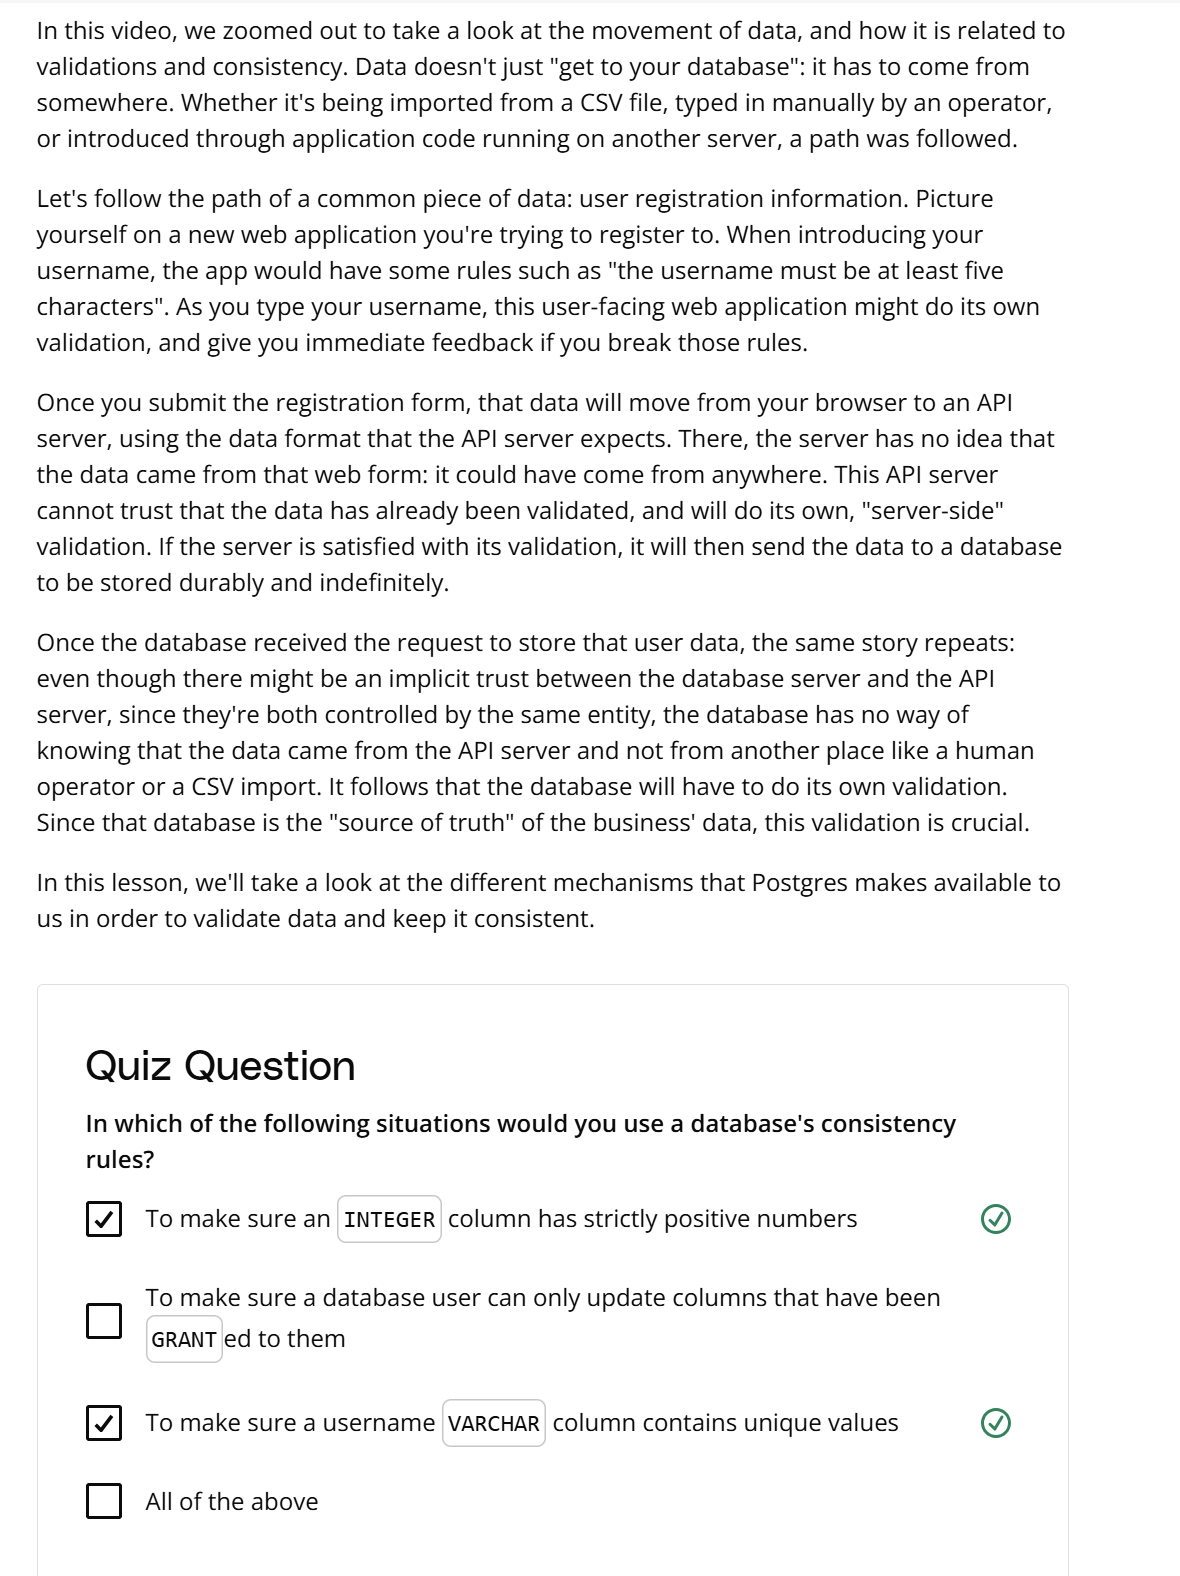

## Unique Constraints

https://www.youtube.com/watch?v=BOcVGiMFZXI

A unique constraint is a type of rule that you can add to a database table to ensure that a column or set of columns are unique across all the rows of the table. A common use-case for that is ensuring that no two users of your system can register with the same username.

https://www.youtube.com/watch?v=DE7ynNOhgUo

When adding a unique constraint to a table, you can choose to give it a name or not. If you don't, Postgres will automatically generate a name for the constraint. Providing your own name for the constraint is a great and simple way to document what business rule this constraint is enforcing.

https://www.youtube.com/watch?v=lfp35TR_1xs

Unique constraints can target multiple columns. In that case, it's the combination of columns that has to be unique across the table.

Follow this link at section 5.3.3 for the full [Postgres Unique Constraints documentation](https://www.postgresql.org/docs/9.6/ddl-constraints.html).

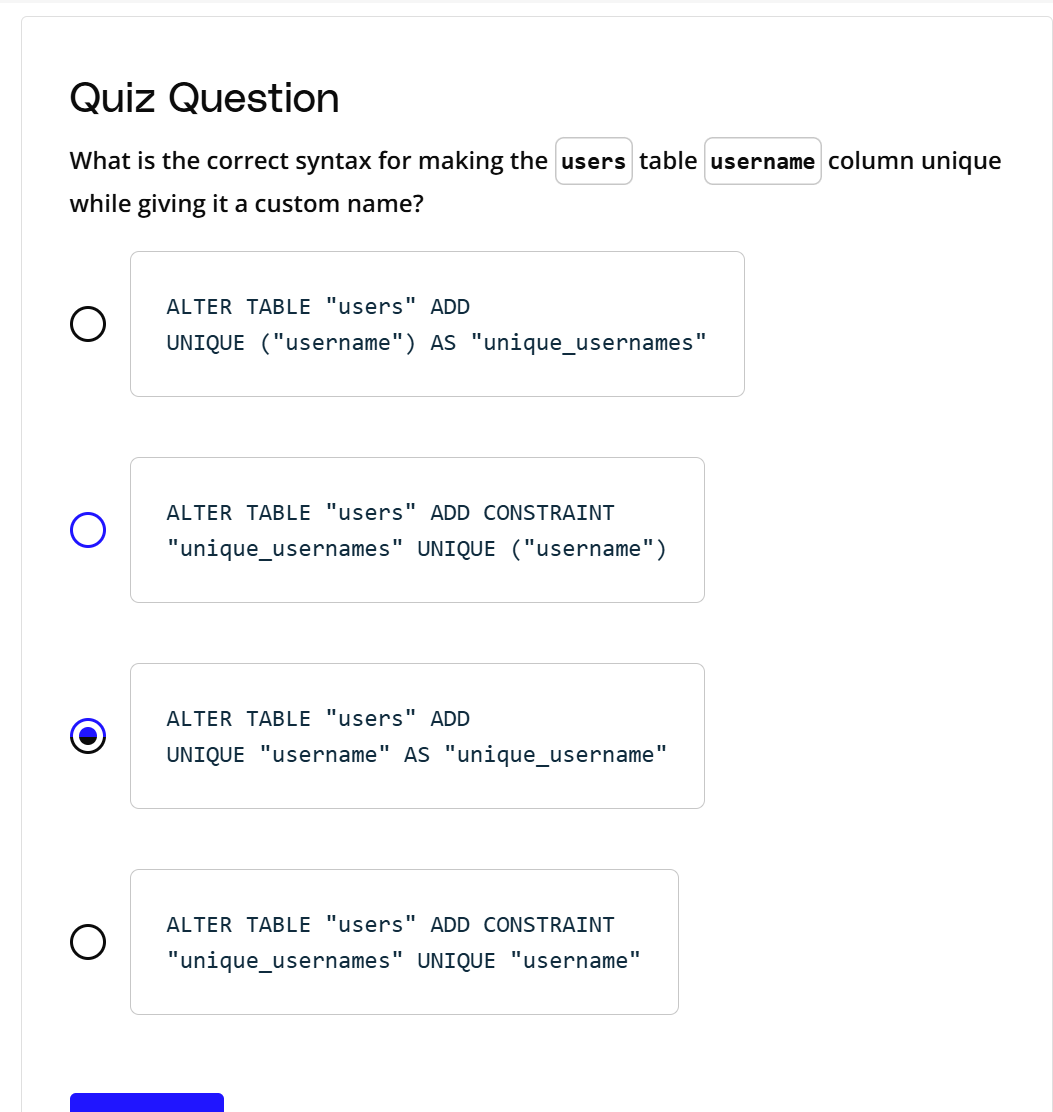

## Primary Key Constraints

https://www.youtube.com/watch?v=X8KCt9bsw2Y

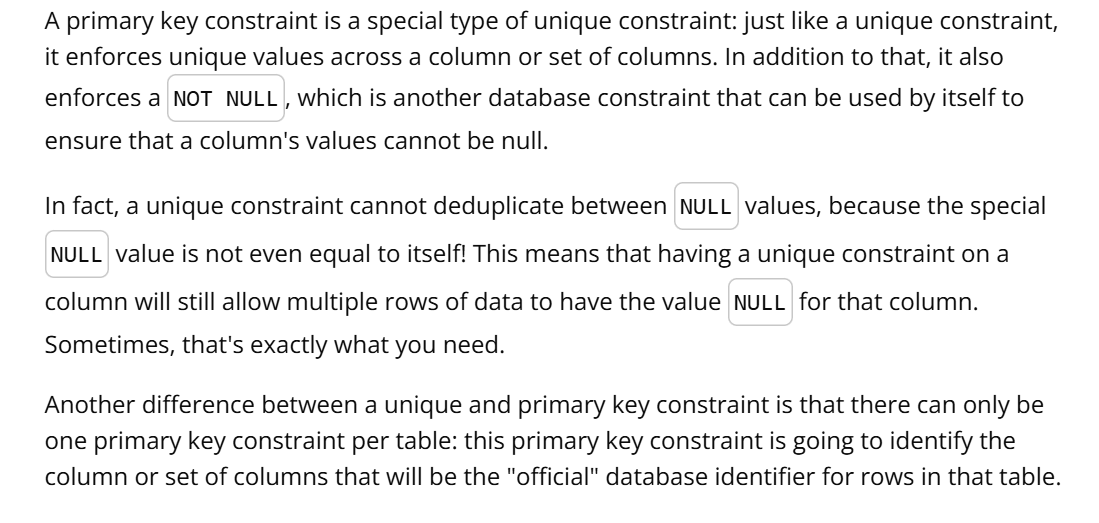

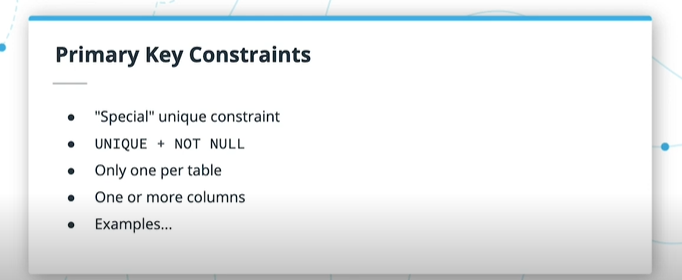

https://www.youtube.com/watch?v=CzWKffitieE

While a `SERIAL` type of column can automatically generate incrementing integer values, only defining a column as `SERIAL` doesn't guarantee uniqueness of the values, since values can be specified manually. Adding a `UNIQUE` constraint could be thought of as being sufficient, but that would allow `NULL` values.

https://www.youtube.com/watch?v=fyu_H3kh_xw

While the combination `UNIQUE NOT NULL` has the same effect in terms of constraints as `PRIMARY KEY`, we'll want to have a primary key constraint on most of our tables: this will be the special unique key that identifies rows in that table.

Often, a good choice is to have a so-called "surrogate key", that is, a key that is artificially generated, and that appears nowhere in the business requirements or verbiage. This will allow us to relate different entities together without relying on a piece of business data whose rules might change in the future. In opposition to a surrogate key, a key using a value that is part of the actual data is called a "natural key".

https://www.youtube.com/watch?v=2BRlsMN10sQ

Follow this link at section 5.3.4 for the full [Postgres primary keys documentation](https://www.postgresql.org/docs/9.6/ddl-constraints.html).

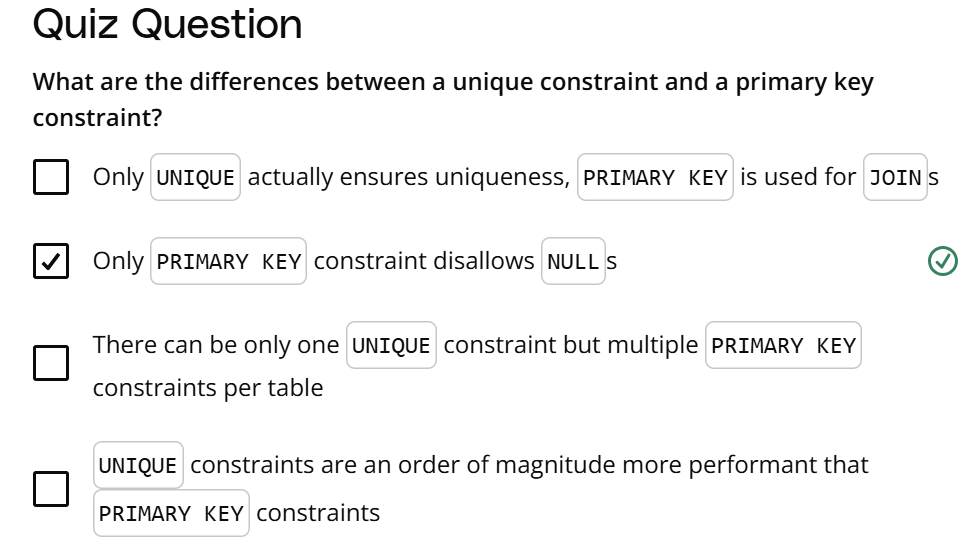

## Unique & Primary Key Constraints Exercise: Solution


https://www.youtube.com/watch?v=OwQV3o5uOXU

Remember: as a first step when confronted with a new database or dataset, always use all the introspection commands available to you — \d, \dt, \d+ — to observe and analyze the data before doing anything else.

https://www.youtube.com/watch?v=4BZp7QVcU9I

Here is the full solution to the exercise:

ALTER TABLE "books" ADD PRIMARY KEY ("id");

ALTER TABLE "books" ADD UNIQUE ("isbn");

ALTER TABLE "authors" ADD PRIMARY KEY ("id");

ALTER TABLE "authors" ADD UNIQUE ("email_address");

ALTER TABLE "book_authors" ADD PRIMARY KEY ("book_id", "author_id");

ALTER TABLE "book_authors" ADD UNIQUE ("book_id", "contribution_rank");

## Foreign Key Constraints

https://www.youtube.com/watch?v=9NXvnBxjvT8

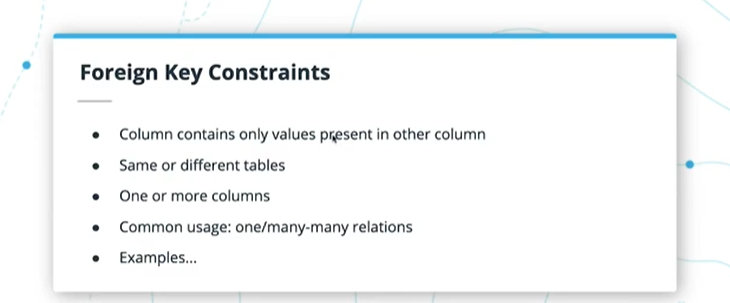

Foreign key constraints will restrict the values in a column to only values that appear in another column. They're often used to relate IDs in relationships between tables, thereby preserving what we call "referential integrity". In many cases, the foreign key will refer to a primary key in another table, but that is not necessary. Any column can be referenced by a foreign key constraint.

https://www.youtube.com/watch?v=OAaIcbl0_UY

TRUNCATE TABLE comments;

ALTER TABLE "comments"
    ADD FOREIGN KEY ("user_id") REFERENCES "users" ("id")

INSERT INTO "comments" ("user_id", "content") VALUES (100, 'comment text'), (-5, 'other comment text...');

ALTER TABLE "comment_likes"
    ADD FOREIGN KEY ("user_id") REFERENCES "users";
ALTER TABLE "comment_likes"
    ADD FOREIGN KEY ("comment_id") REFERENCES "comments" ("id");

DROP TABLE "comment_likes";

CREATE TABLE "comment_likes" (
    "user_id" INTEGER REFERENCES "users",
    "comment_id" INTEGER,
    FOREIGN KEY ("comment_id") REFERENCES "comments" ("id")
);


;

We can add foreign key constraints while creating a table, either by adding a `REFERENCES` clause with the column definition, or by adding a `CONSTRAINT … FOREIGN KEY` clause along with all the column definitions.

The basic syntax would be:

FOREIGN KEY "referencing_column" 
REFERENCES "referenced_table" ("referenced_column")

If we omit the `("referenced_column")` part of the foreign key definition, then it will be implied that we are referencing the primary key of the referenced table. This is one more thing that makes primary key constraints special compared to unique constraints.

The point of a foreign key constraint is to ensure that values in a column are present in another column.

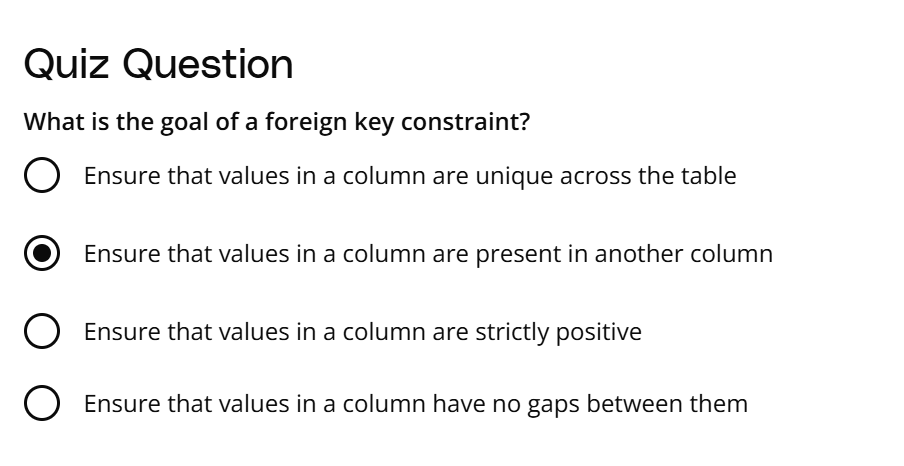

## Foreign Key Constraints: Modifiers

https://www.youtube.com/watch?v=1Y-mT1KYG2M

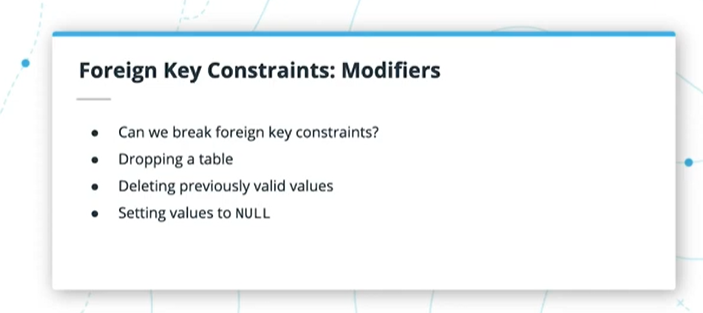

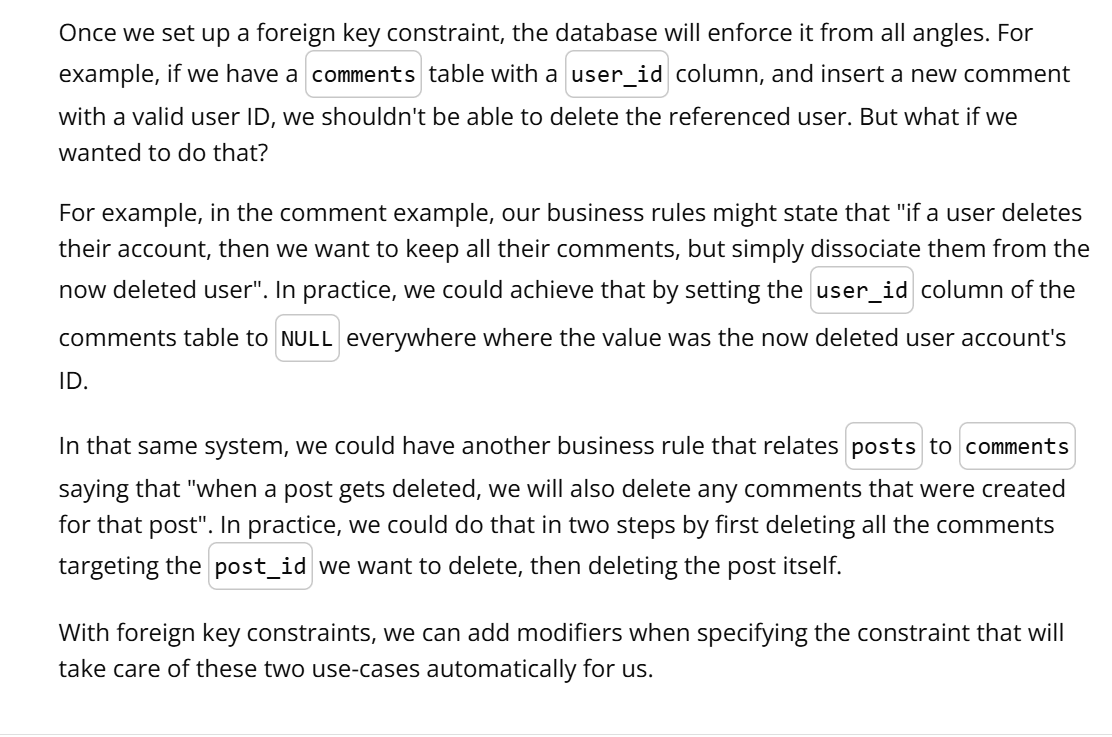

https://www.youtube.com/watch?v=Lt9wsx93Kqc

Adding `ON DELETE CASCADE` to a foreign key constraint will have the effect that when the referenced data gets deleted, the referencing rows of data will be automatically deleted as well.

https://www.youtube.com/watch?v=DCmGJxgIPfE

Adding `ON DELETE SET NULL` to a foreign key constraint will have the effect that when the referenced data gets deleted, the referring column will have its value set to `NULL`. Since `NULL` is a special value, it won't break the foreign key constraint because it will be clear that that row of data is now referencing absolutely nothing.

Follow this link at section 5.3.5 for the [Postgres foreign key constraints documentation](https://www.postgresql.org/docs/9.6/ddl-constraints.html).

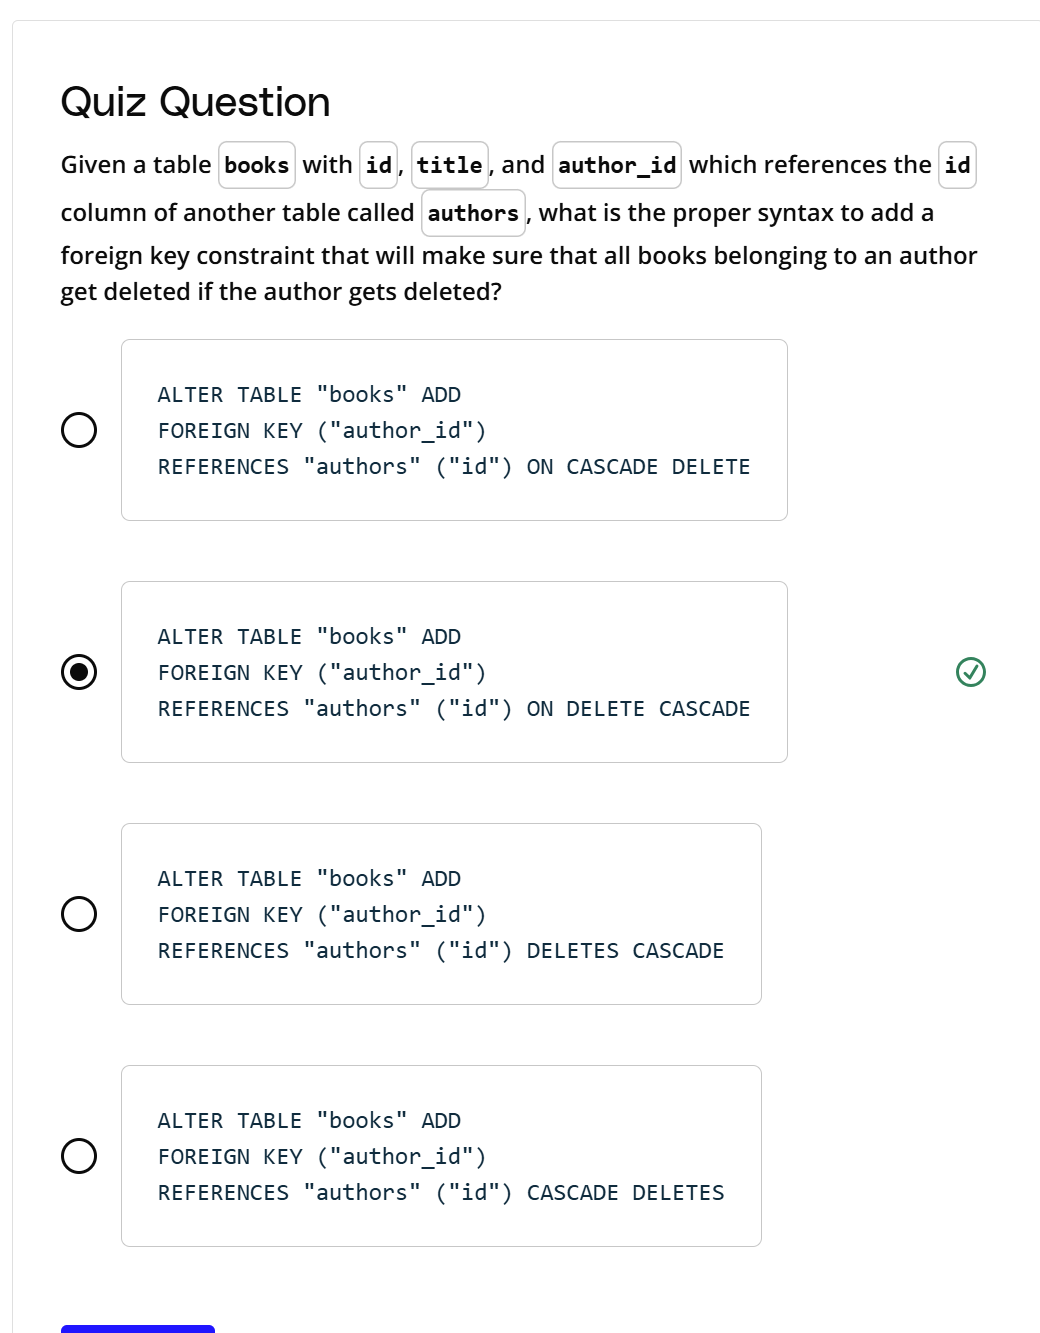

## Exercise: Foreign Key Constraints

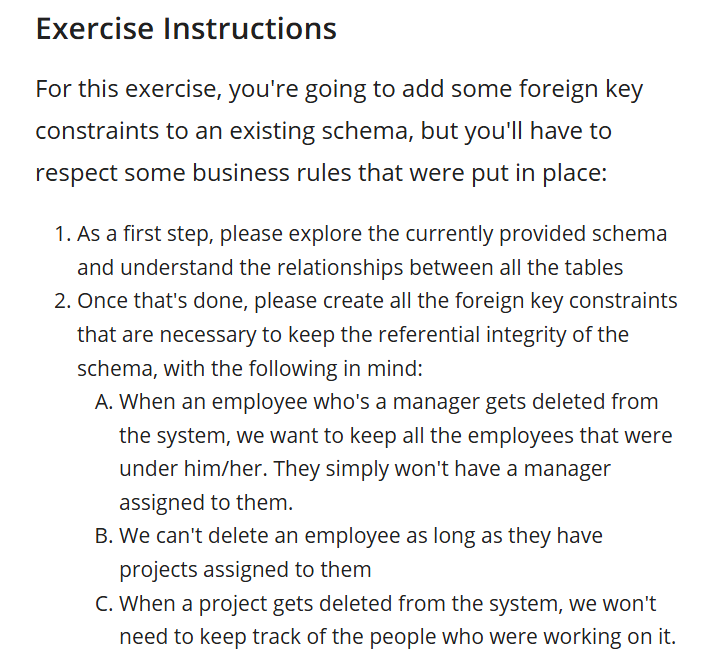

ALTER TABLE employees
ADD FOREIGN KEY ("manager_id") REFERENCES employees ("id") ON DELETE SET NULL

ALTER employee_projects
ADD FOREIGN KEY (project_id) REFERENCES projects ("id") ON DELETE CASCADE,
ADD FOREIGN KEY (employee_id) REFERENCES employees("id") ON DELETE RESTRICT

## Solution: Foreign Key Constraints Exercise

https://www.youtube.com/watch?v=BhWiFFoJRp4

Contrary to the exercise you were given, in practice business requirements will rarely tell you that "things have to be consistent": that's something that is implied. However, in the context of foreign keys, business requirements often hint at how you should set up these constraints, in terms of what should happen to referencing data when referenced data gets modified or deleted.

https://www.youtube.com/watch?v=cuMaQLKDiEc

Here is the full solution to the exercise you were given:

In [ ]:
ALTER TABLE "employees"
  ADD CONSTRAINT "valid_manager"
  FOREIGN KEY ("manager_id") REFERENCES "employees" ("id") ON DELETE SET NULL;

ALTER TABLE "employee_projects"
  ADD CONSTRAINT "valid_employee"
  FOREIGN KEY ("employee_id") REFERENCES "employees" ("id");

ALTER TABLE "employee_projects"
  ADD CONSTRAINT "valid_project"
  FOREIGN KEY ("project_id") REFERENCES "projects" ("id") ON DELETE CASCADE;

## Check Constraints

https://www.youtube.com/watch?v=inQ8XYb2eRQ

`CHECK` constraints allow us to implement custom business rules at the level of the database. Examples of such rules would be: "a product can't have a negative quantity" or "the discount price should always be less than the regular price".

https://www.youtube.com/watch?v=R3f_k-7-8EA

A `CHECK` constraint can be added either after a table was created, or during table creation. Like all other constraints, it can be added along with the column definition, or along with all the column definitions.

The general syntax of the constraint is`: CHECK (some expression that returns true or fals`e). The expression can target one column, multiple columns, and use any Postgres functions to do its checking.

https://www.youtube.com/watch?v=HPGWtXCR-S4

Follow this link at section 5.3.1 for the full [Postgres check constraints documentation](https://www.postgresql.org/docs/9.6/ddl-constraints.html).

## Check Constraints Quizzesa

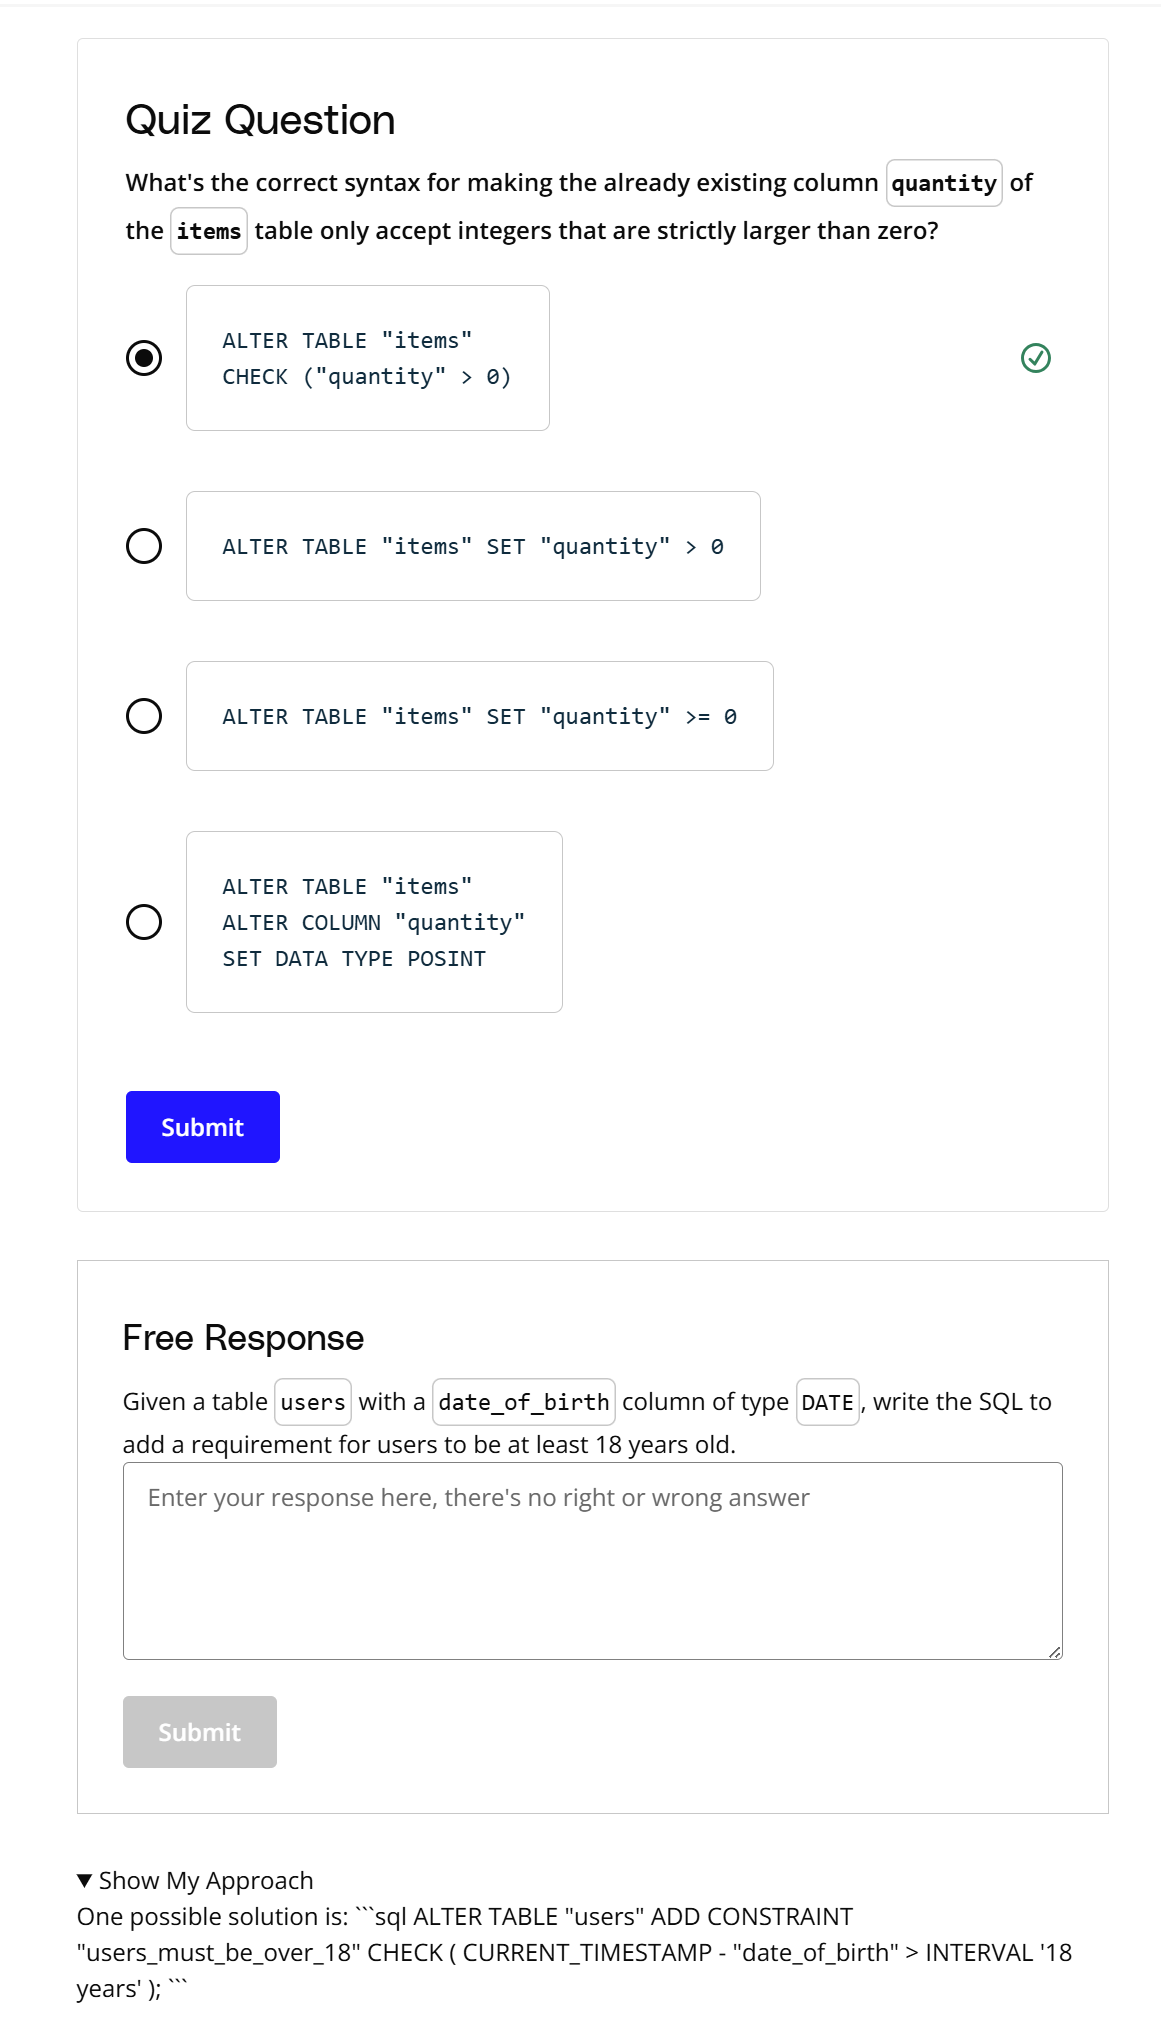

## Constraints Review

### Final Review

https://www.youtube.com/watch?v=klM-z0pJAuA

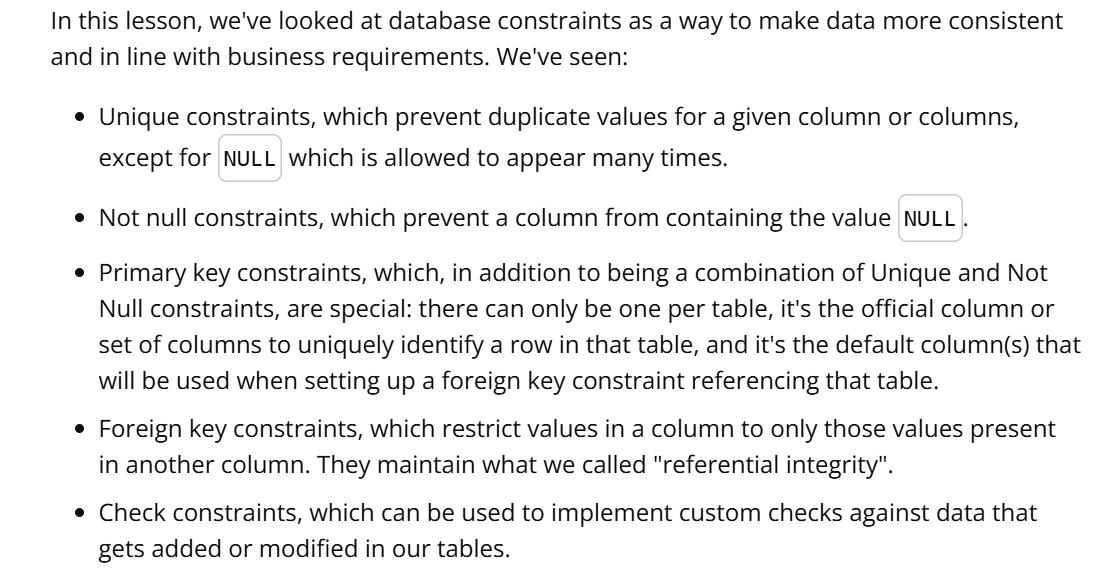

## Exercise: Final Review

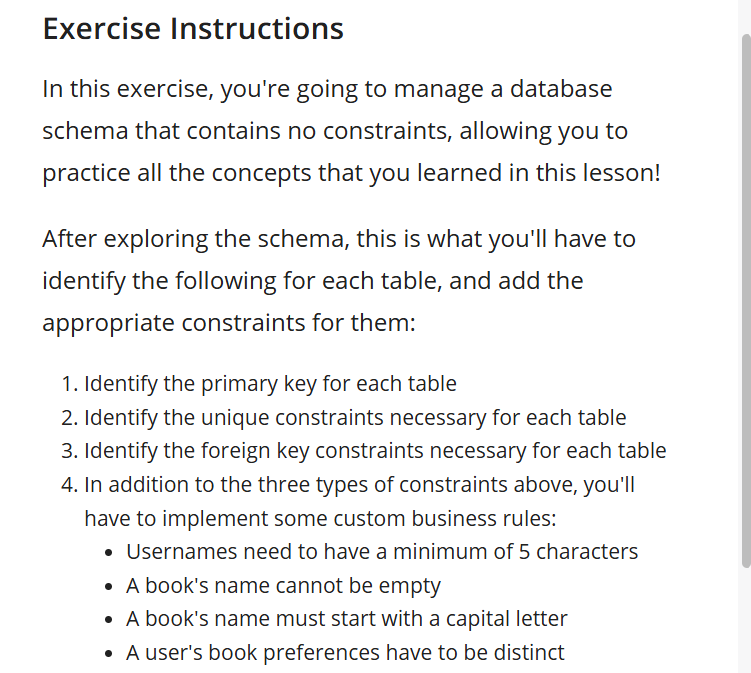

In [ ]:
ALTER TABLE books
ADD CONSTRAINT "book_pk" PRIMARY KEY ("id"),
ADD CONSTRAINT "unique_book" UNIQUE ("isbn"),
ADD CONSTRAINT "books_name_not_empty" CHECK (LENGTH(TRIM("name")) > 0),
ADD CONSTRAINT "books_start_with_uppercase" (CHECK(LEFT("name", 1) = UPPER(LEFT("name", 1))));

ALTER TABLE users
ADD CONSTRAINT "user_pk" PRIMARY KEY ("id"),
ADD CONSTRAINT "unique_email" UNIQUE ("email"),
ADD CONSTRAINT "unique_username" UNIQUE ("username"),
ADD CONSTRAINT "username_limit" CHECK (LENGTH("username") >= 5);

ALTER TABLE user_book_preferences
ADD CONSTRAINT "user_book_pk" PRIMARY KEY ("user_id", "book_id"),
ADD CONSTRAINT "user_fk" FOREIGN KEY ("user_id") REFERENCES "users" ("id"),
ADD CONSTRAINT "book_fk" FOREIGN KEY("book_id") REFERENCES "books" ("id"),
ADD CONSTRAINT "unique_user_pref" UNIQUE ("user_id", "preference");

## Final Review Exercise Solution

https://www.youtube.com/watch?v=kGkeNIBO6uE

Remember to always use `\dt` and `\d table_name` to explore a new database before interacting with it! You'll gain many insights into the data types and constraints defined in that database.

https://www.youtube.com/watch?v=hsZs4KUYO5Y

Here is the full solution to this exercise:

In [ ]:
-- Primary and unique keys
ALTER TABLE "users"
  ADD PRIMARY KEY ("id"),
  ADD UNIQUE ("username"),
  ADD UNIQUE ("email");

ALTER TABLE "books"
  ADD PRIMARY KEY ("id"),
  ADD UNIQUE ("isbn");

ALTER TABLE "user_book_preferences"
  ADD PRIMARY KEY ("user_id", "book_id");


-- Foreign keys
ALTER TABLE "user_book_preferences"
  ADD FOREIGN KEY ("user_id") REFERENCES "users",
  ADD FOREIGN KEY ("book_id") REFERENCES "books";


-- Usernames need to have a minimum of 5 characters
ALTER TABLE "users" ADD CHECK (LENGTH("username") >= 5);


-- A book's name cannot be empty
ALTER TABLE "books" ADD CHECK(LENGTH(TRIM("name")) > 0);


-- A book's name must start with a capital letter
ALTER TABLE "books" ADD CHECK (
  SUBSTR("name", 1, 1) = UPPER(SUBSTR("name", 1, 1))
);


-- A user's book preferences have to be distinct
ALTER TABLE "user_book_preferences" ADD UNIQUE ("user_id", "preference");

## Lesson Conclusion

Constraints: Conclusion

https://www.youtube.com/watch?v=6wMXzzIb0J0

This lesson was fundamental in allowing us to get a tighter grip on our data. In the next and final lesson on relational databases, we'll see how to keep the database performing well even when storing and querying large amounts of data!

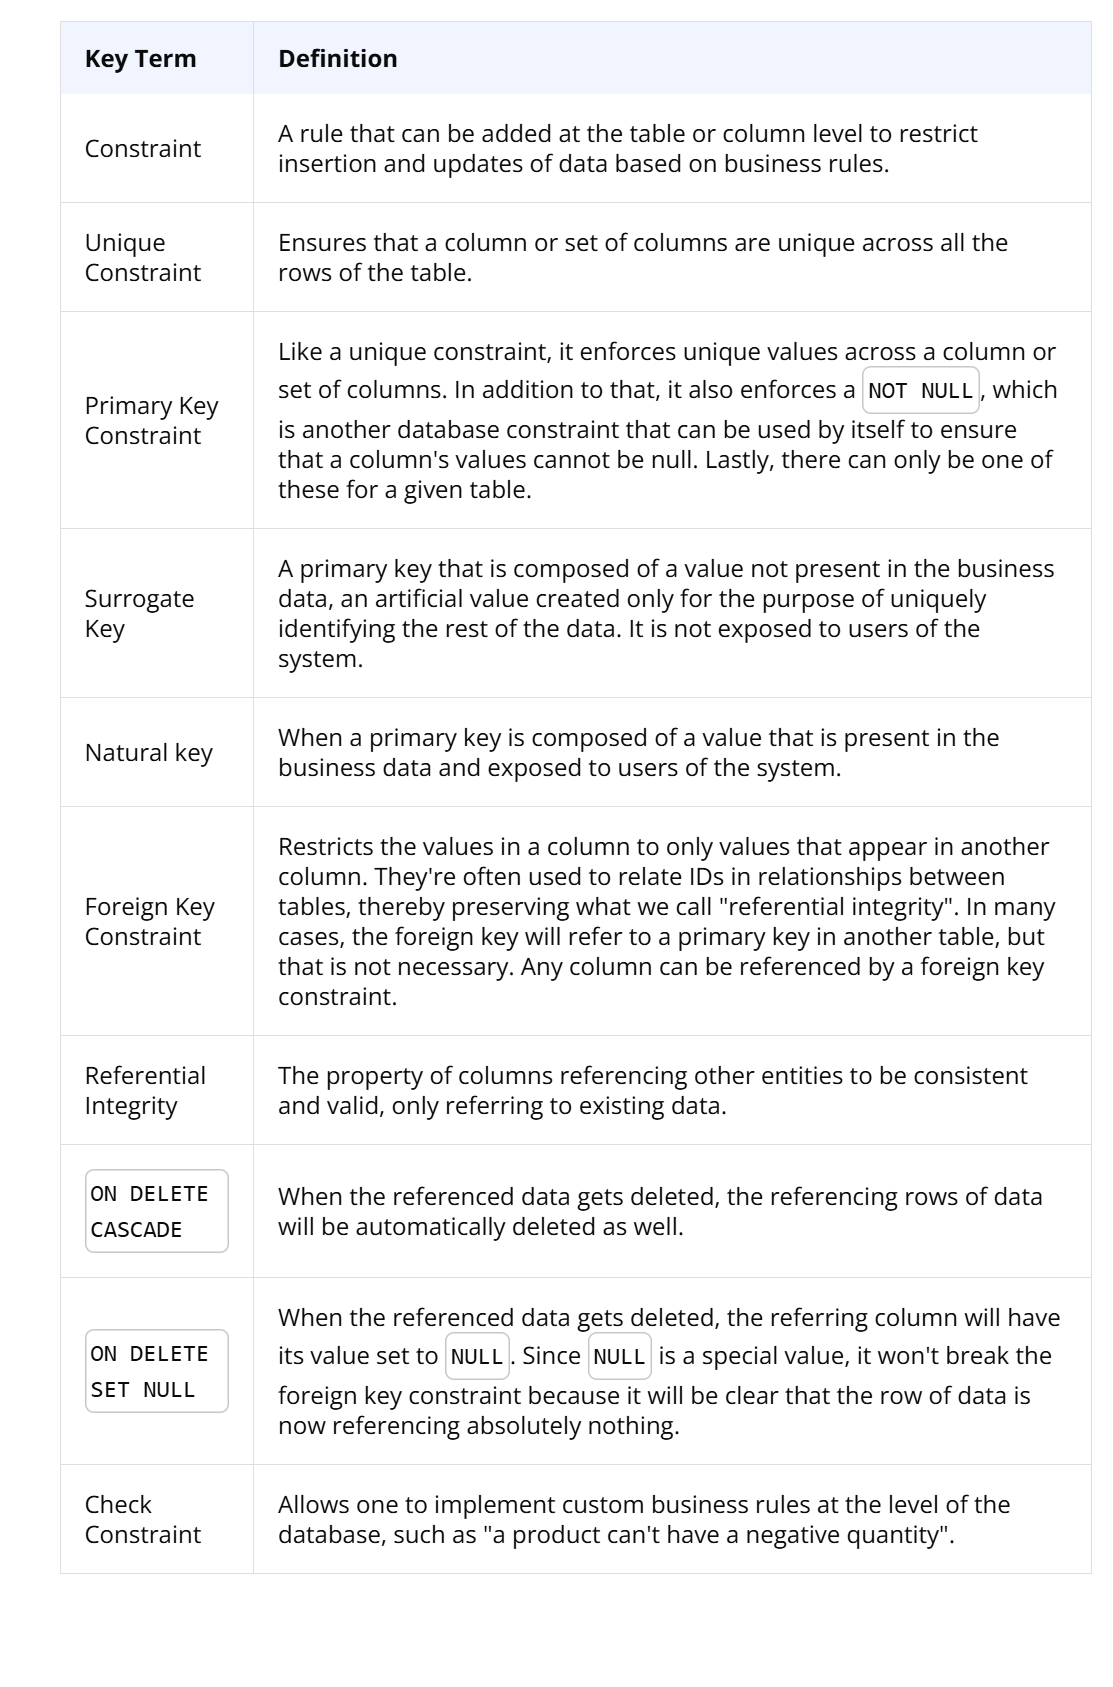